Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle

First reload the data we generated in `1_notmnist.ipynb`.

In [3]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [4]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [5]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

In [6]:
import sklearn.linear_model as Linear

In [7]:
Train1Dlabels = []
Valid1Dlabels = []
Test1Dlabels = []

def label_data(data):
    Tlabels = []
    for label in data:
        truelabel = [i for i, x in enumerate(label) if x]
        Tlabels.append(truelabel[0])
    return Tlabels
    
Train1Dlabels = label_data(train_labels)
Valid1Dlabels = label_data(valid_labels)
Test1Dlabels = label_data(test_labels)



In [56]:
X = train_dataset[:5000]
Y = Train1Dlabels[:5000]
X_valid = valid_dataset[:500]
Y_valid = Valid1Dlabels[:500]

L2_weights = [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 
              0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.01,
              0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
              0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0]
Verror = []
Trerror = []
for weight in L2_weights:
    regr = Linear.LogisticRegression(C=weight)
    regr.fit(X,Y)
    Verror.append(1.0 - regr.score(X_valid,Y_valid));
    Trerror.append(1.0 - regr.score(X,Y))
    print (weight, 1.0 - regr.score(X,Y), 1.0 - regr.score(X_valid,Y_valid))

1e-05 0.2846 0.302
0.0001 0.2288 0.248
0.001 0.1936 0.226
0.002 0.1838 0.212
0.003 0.1782 0.212
0.004 0.1726 0.208
0.005 0.171 0.208
0.006 0.1684 0.206
0.007 0.1666 0.208
0.008 0.1644 0.208
0.009 0.1628 0.206
0.01 0.1624 0.204
0.01 0.1624 0.204
0.02 0.149 0.208
0.03 0.1402 0.206
0.04 0.135 0.202
0.05 0.13 0.2
0.06 0.1266 0.2
0.07 0.1238 0.198
0.08 0.1198 0.198
0.09 0.1184 0.198
0.1 0.1148 0.198
0.2 0.0956 0.2
0.3 0.0824 0.206
0.4 0.073 0.214
0.5 0.068 0.22
0.6 0.062 0.22
0.7 0.0588 0.224
0.8 0.0554 0.224
0.9 0.0518 0.226
1.0 0.0498 0.228
10.0 0.0086 0.258


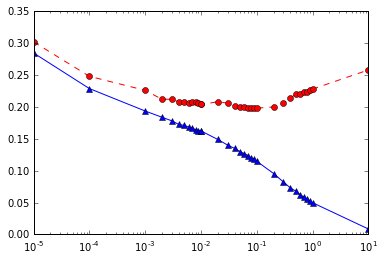

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(L2_weights,Trerror, "b^-", label = "Training")
plt.plot(L2_weights,Verror, "ro--", label = "Validation")
plt.xscale('log')
plt.show(); plt.close()

### - Plot above show that the minima in validation error accors when L2-penalty weight ~ 0.085
### - Lets see if the crossvalidation agree with us

In [60]:
regr = Linear.LogisticRegressionCV()
regr.fit(X,Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [68]:
print (regr.C_)

[ 0.04641589  0.04641589  0.04641589  0.04641589  0.04641589  0.04641589
  0.04641589  0.04641589  0.00599484  0.04641589]


### There are two L2-panelties ~= 0.04641589, 0.006
#### so, lets try all of them, see which one is the best one.. 

In [23]:
batch_size = 128
n_nodes = 1024
L2_weight = 0.085
num_steps = 3001

def tf_modelRegr(batch_size,n_nodes,num_steps,L2_weight):

    graph = tf.Graph()
    with graph.as_default():

        # Input data. For the training data, we use a placeholder that will be fed
        # at run time with a training minibatch.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
        tf_train_labels =  tf.placeholder(tf.float32,shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)

        # input layer - (784 col) * (784 row x 1024 col) + (1024 col) = (1024 col)
        weights_01 = tf.Variable(tf.truncated_normal([image_size * image_size, n_nodes]))
        biases_01 = tf.Variable(tf.zeros([n_nodes]))

        # then hidden layer - rectified linear on output of input layer
        # output layer - (1024 col) * (1024 row x 10 col) + (10 col) = (10 col)
        weights_12 = tf.Variable(tf.truncated_normal([n_nodes, num_labels]))
        biases_12 = tf.Variable(tf.zeros([num_labels]))

        # Training computation.
        logits_01 = tf.matmul(tf_train_dataset, weights_01) + biases_01   ## input layer
        h1 = tf.nn.relu(logits_01) ## Hidden layer
        logits_12 = tf.matmul(h1, weights_12) + biases_12     ## output layer

        ## calculating loss function
        loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits_12) + 
            L2_weight*tf.nn.l2_loss(weights_01) + 
            L2_weight*tf.nn.l2_loss(weights_12)
        )

        # Optimizer.
        optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

        # Predictions for the training
        train_prediction = tf.nn.softmax(logits_12) 
        valid_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
        test_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
 
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        #print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
#             if (step % 500 == 0):
#                 print("Minibatch loss at step %d: %f" % (step, l))
#                 print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
#                 print("Validation accuracy: %.1f%%" % accuracy(
#                 valid_prediction.eval(), valid_labels))
        #print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        print(L2_weight, 
              accuracy(valid_prediction.eval(), valid_labels), 
              accuracy(test_prediction.eval(), test_labels))
        

In [24]:
weights = [0.0005,0.00075,0.0008,0.0009,0.001,0.002,0.0025,0.005,0.0075]
for L2_W in weights:
    tf_modelRegr(batch_size=128,n_nodes=1024,num_steps=3001,L2_weight=L2_W)

0.0005 84.09 90.87
0.00075 85.82 92.21
0.0008 86.24 92.28
0.0009 86.58 92.85
0.001 86.77 93.02
0.002 86.25 92.41
0.0025 86.03 92.23
0.005 84.61 90.81
0.0075 83.68 90.03


### - L2 weight which maximize the validation and test error is 0.001 
### - maximum test accuracy = 93.02%

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

In [33]:

def tf_modelRegr_overfit(batch_size,n_nodes,num_steps,L2_weight):

    graph = tf.Graph()
    with graph.as_default():

        # Input data. For the training data, we use a placeholder that will be fed
        # at run time with a training minibatch.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
        tf_train_labels =  tf.placeholder(tf.float32,shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)

        # input layer - (784 col) * (784 row x 1024 col) + (1024 col) = (1024 col)
        weights_01 = tf.Variable(tf.truncated_normal([image_size * image_size, n_nodes]))
        biases_01 = tf.Variable(tf.zeros([n_nodes]))

        # then hidden layer - rectified linear on output of input layer
        # output layer - (1024 col) * (1024 row x 10 col) + (10 col) = (10 col)
        weights_12 = tf.Variable(tf.truncated_normal([n_nodes, num_labels]))
        biases_12 = tf.Variable(tf.zeros([num_labels]))

        # Training computation.
        logits_01 = tf.matmul(tf_train_dataset, weights_01) + biases_01   ## input layer
        h1 = tf.nn.relu(logits_01) ## Hidden layer
        logits_12 = tf.matmul(h1, weights_12) + biases_12     ## output layer

        ## calculating loss function
        loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits_12) + 
            L2_weight*tf.nn.l2_loss(weights_01) + 
            L2_weight*tf.nn.l2_loss(weights_12)
        )

        # Optimizer.
        optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

        # Predictions for the training
        train_prediction = tf.nn.softmax(logits_12) 
        valid_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
        test_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
        
    Tdata = train_dataset[:20000]
    Tlabel = train_labels[:20000]
 
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        #print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (Tlabel.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = Tdata[offset:(offset + batch_size), :]
            batch_labels = Tlabel[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                valid_prediction.eval(), valid_labels))
        #print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        print(L2_weight, 
              accuracy(valid_prediction.eval(), valid_labels), 
              accuracy(test_prediction.eval(), test_labels))
        

In [34]:
batch_size = 128
n_nodes = 1024
L2_weight = 0.085
num_steps = 3001
tf_modelRegr_overfit(batch_size=128,n_nodes=1024,num_steps=3001,L2_weight=0.001)

Minibatch loss at step 0: 634.014832
Minibatch accuracy: 14.1%
Validation accuracy: 35.8%
Minibatch loss at step 500: 192.429443
Minibatch accuracy: 90.6%
Validation accuracy: 80.3%
Minibatch loss at step 1000: 115.044525
Minibatch accuracy: 92.2%
Validation accuracy: 81.0%
Minibatch loss at step 1500: 69.354401
Minibatch accuracy: 96.9%
Validation accuracy: 82.3%
Minibatch loss at step 2000: 42.004883
Minibatch accuracy: 100.0%
Validation accuracy: 83.1%
Minibatch loss at step 2500: 25.494728
Minibatch accuracy: 100.0%
Validation accuracy: 83.7%
Minibatch loss at step 3000: 15.564071
Minibatch accuracy: 98.4%
Validation accuracy: 84.3%
0.001 84.28 91.1


### overfit - note that the minibatch (training) accuracy is nearly 100%, a clear sign of overfit. 

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

In [41]:

def tf_modelRegr_overfit(batch_size,n_nodes,num_steps,L2_weight):

    graph = tf.Graph()
    with graph.as_default():

        # Input data. For the training data, we use a placeholder that will be fed
        # at run time with a training minibatch.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
        tf_train_labels =  tf.placeholder(tf.float32,shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)

        # input layer - (784 col) * (784 row x 1024 col) + (1024 col) = (1024 col)
        weights_01 = tf.Variable(tf.truncated_normal([image_size * image_size, n_nodes]))
        biases_01 = tf.Variable(tf.zeros([n_nodes]))

        # then hidden layer - rectified linear on output of input layer
        # output layer - (1024 col) * (1024 row x 10 col) + (10 col) = (10 col)
        weights_12 = tf.Variable(tf.truncated_normal([n_nodes, num_labels]))
        biases_12 = tf.Variable(tf.zeros([num_labels]))

        # Training computation.
        logits_01 = tf.matmul(tf_train_dataset, weights_01) + biases_01   ## input layer
        h1 = tf.nn.relu(logits_01) ## Hidden layer
        h1_drop = tf.nn.dropout(h1,0.50)
        logits_12 = tf.matmul(h1_drop, weights_12) + biases_12     ## output layer

        ## calculating loss function
        loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits_12) + 
            L2_weight*tf.nn.l2_loss(weights_01) + 
            L2_weight*tf.nn.l2_loss(weights_12)
        )

        # Optimizer.
        optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

        # Predictions for the training
        train_prediction = tf.nn.softmax(logits_12) 
        valid_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
        test_prediction = tf.nn.softmax(
            tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_01) + biases_01), weights_12) + biases_12
        )
        
    Tdata = train_dataset[:20000]
    Tlabel = train_labels[:20000]
 
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        #print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (Tlabel.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = Tdata[offset:(offset + batch_size), :]
            batch_labels = Tlabel[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                valid_prediction.eval(), valid_labels))
        #print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        print("L2_Weight, Validation Error, Test Error")
        print(L2_weight, 
              accuracy(valid_prediction.eval(), valid_labels), 
              accuracy(test_prediction.eval(), test_labels))
        

In [42]:
tf_modelRegr_overfit(batch_size=128,n_nodes=1024,num_steps=3001,L2_weight=0.001)

Minibatch loss at step 0: 817.575928
Minibatch accuracy: 9.4%
Validation accuracy: 34.3%
Minibatch loss at step 500: 198.934082
Minibatch accuracy: 82.8%
Validation accuracy: 80.5%
Minibatch loss at step 1000: 117.691956
Minibatch accuracy: 81.2%
Validation accuracy: 81.5%
Minibatch loss at step 1500: 70.531876
Minibatch accuracy: 83.6%
Validation accuracy: 82.0%
Minibatch loss at step 2000: 42.372993
Minibatch accuracy: 88.3%
Validation accuracy: 83.5%
Minibatch loss at step 2500: 25.687977
Minibatch accuracy: 93.0%
Validation accuracy: 84.2%
Minibatch loss at step 3000: 15.782421
Minibatch accuracy: 91.4%
Validation accuracy: 84.9%
L2_Weight, Validation Error, Test Error
0.001 84.89 91.67


### I am not sure if I implemented the dropout properly.. But.. The minibatch accuracy (training error) seems to be better controlled than before and "might" not be over fitted. Also, test error is 91.67 which is preety good for only 20000 data points. 

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---


## Try net with 2 hidden layers

In [112]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784    # MNIST data input (img shape: 28*28)
n_classes = 10   # MNIST total classes (0-9 digits)


def multilayer_perceptron(data, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(data, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer 2 with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer


def tfDeep_modelRegr(batch_size,num_steps,L2_weight):

    graph = tf.Graph()
    with graph.as_default():

        # Input data. For the training data, we use a placeholder that will be fed
        # at run time with a training minibatch.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, n_input))
        tf_train_labels =  tf.placeholder(tf.float32,shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)
        
        # Store layers weight & bias
        weights = {
            'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], 
                                                  stddev=np.sqrt(2.0 /float(n_input)))
                              ),
            'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],
                                                 stddev=np.sqrt(2.0 /float(n_hidden_1)))
                             ),
            'out': tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],
                                                  stddev=np.sqrt(2.0 /float(n_hidden_2)))
                              )
        }
        biases = {
            'b1': tf.Variable(tf.zeros([n_hidden_1])),
            'b2': tf.Variable(tf.zeros([n_hidden_2])),
            'out': tf.Variable(tf.zeros([n_classes]))
        }

        # Construct model
        pred = multilayer_perceptron(tf_train_dataset, weights, biases)

        ## calculating loss function
        loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=pred) + 
            L2_weight*tf.nn.l2_loss(weights['h1']) + 
            L2_weight*tf.nn.l2_loss(weights['h2']) +
            L2_weight*tf.nn.l2_loss(weights['out'])
        )
        
        # Optimizer.
        #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
        global_step = tf.Variable(0)
        learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)
        #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

        # Predictions for the training
        train_prediction = tf.nn.softmax(pred) 
        valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
        test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))
        
 
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        #print("Initialized")
        for step in range(num_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels}
            
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            
            if (step % 500 == 0):
                #print(predictions)
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
                
        #print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        print(L2_weight, 
              accuracy(valid_prediction.eval(), valid_labels), 
              accuracy(test_prediction.eval(), test_labels))
        

In [113]:
tfDeep_modelRegr(batch_size=128,num_steps=3001,L2_weight=0.001)

Minibatch loss at step 0: 2.767899
Minibatch accuracy: 10.9%
Validation accuracy: 36.4%
Minibatch loss at step 500: 0.741792
Minibatch accuracy: 85.9%
Validation accuracy: 85.4%
Minibatch loss at step 1000: 0.579215
Minibatch accuracy: 87.5%
Validation accuracy: 86.5%
Minibatch loss at step 1500: 0.684901
Minibatch accuracy: 84.4%
Validation accuracy: 87.6%
Minibatch loss at step 2000: 0.538576
Minibatch accuracy: 88.3%
Validation accuracy: 87.6%
Minibatch loss at step 2500: 0.559691
Minibatch accuracy: 87.5%
Validation accuracy: 87.8%
Minibatch loss at step 3000: 0.496582
Minibatch accuracy: 87.5%
Validation accuracy: 88.4%
0.001 88.44 94.29


## Try now with 5 hidden layers

In [ ]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784    # MNIST data input (img shape: 28*28)
n_classes = 10   # MNIST total classes (0-9 digits)


def multilayer_perceptron(data, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(data, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer 2 with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer


def tfDeep_modelRegr(batch_size,num_steps,L2_weight):

    graph = tf.Graph()
    with graph.as_default():

        # Input data. For the training data, we use a placeholder that will be fed
        # at run time with a training minibatch.
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, n_input))
        tf_train_labels =  tf.placeholder(tf.float32,shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)
        
        # Store layers weight & bias
        weights = {
            'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], 
                                                  stddev=np.sqrt(2.0 /float(n_input)))
                              ),
            'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],
                                                 stddev=np.sqrt(2.0 /float(n_hidden_1)))
                             ),
            'out': tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],
                                                  stddev=np.sqrt(2.0 /float(n_hidden_2)))
                              )
        }
        biases = {
            'b1': tf.Variable(tf.zeros([n_hidden_1])),
            'b2': tf.Variable(tf.zeros([n_hidden_2])),
            'out': tf.Variable(tf.zeros([n_classes]))
        }

        # Construct model
        pred = multilayer_perceptron(tf_train_dataset, weights, biases)

        ## calculating loss function
        loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=pred) + 
            L2_weight*tf.nn.l2_loss(weights['h1']) + 
            L2_weight*tf.nn.l2_loss(weights['h2']) +
            L2_weight*tf.nn.l2_loss(weights['out'])
        )
        
        # Optimizer.
        #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
        global_step = tf.Variable(0)
        learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)
        #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

        # Predictions for the training
        train_prediction = tf.nn.softmax(pred) 
        valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
        test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))
        
 
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        #print("Initialized")
        for step in range(num_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels}
            
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            
            if (step % 500 == 0):
                #print(predictions)
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
                
        #print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        print(L2_weight, 
              accuracy(valid_prediction.eval(), valid_labels), 
              accuracy(test_prediction.eval(), test_labels))
        